# Term Deposit Prediction | Machine Learning

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia : [Investopedia](https://www.investopedia.com/terms/t/termdeposit.asp)<br>

This datasets can be used for 2 different business goals:

1. Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient.
2. Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

Use this prediction to optimize marketing campaigns to attract more customers to open term deposit. 

Detailed description of the dataset's content is describe in this source [Datasets Source](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc, precision_score, recall_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data_model = pd.read_csv('data_clean.csv')
data_model

,age,default,housing,loan,duration,campaign,previous,deposit,job_admin.,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,1,0,1042,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,56,0,0,0,1467,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,41,0,1,0,1389,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,55,0,1,0,579,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,54,0,0,0,673,2,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,0,257,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
11158,39,0,0,0,83,4,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
11159,32,0,0,0,156,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
11160,43,0,0,1,9,2,5,0,0,0,...,1,0,0,1,0,0,1,0,0,0


<hr>

### Data Splitting

Before we feed our data into the model, we need to split our dataset into train and test datasets. We will use sklearn train test split.

In [3]:
X = data_model.drop('deposit', axis=1)
y = data_model['deposit']
Xtr,Xts,ytr,yts = train_test_split(X,y,test_size = 0.2,random_state=42)


In [4]:
display(Xtr.shape)
display(Xts.shape)


(8929, 30)

(2233, 30)

<hr>

### Machine Learning

Now let's use cleaned datasets for prediction of campaign outcome with help of machine learning classification models.
The classifications are: 
- `LogisticRegression`
- `DecisionTreeClassifier`
- `RandomForestClassifier`
- `GradientBoostingClassifier`


#### Logistic Regression

Logistic Regression it’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.<br>
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).<br>

In [5]:
lrg = LogisticRegression(max_iter=10000)
lrg.fit(Xtr,ytr)
lrg_pred = lrg.predict(Xts)
lrg_proba = lrg.predict_proba(Xts)
lrg_accuracy=accuracy_score(yts, lrg_pred)
lrg_f1=f1_score(yts, lrg_pred)
lrg_precision_pos=precision_score(yts, lrg_pred)
lrg_precision_neg=precision_score(yts, lrg_pred,pos_label=0)
lrg_recall_pos=recall_score(yts, lrg_pred)
lrg_recall_neg=recall_score(yts, lrg_pred,pos_label=0)
lrg_scores = cross_val_score(lrg, Xtr, ytr, cv=3)
lrg_mean = lrg_scores.mean()
lrg_auc= roc_auc_score(yts, lrg_pred)

#### Decision Tree Classifier

Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

Decision Tree consists of :
- Nodes : Test for the value of a certain attribute.
- Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
- Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).


In [6]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtr,ytr)
dtc_pred = dtc.predict(Xts)
dtc_proba = dtc.predict_proba(Xts)
dtc_accuracy=accuracy_score(yts, dtc_pred)
dtc_f1=f1_score(yts, dtc_pred)
dtc_precision_pos=precision_score(yts, dtc_pred)
dtc_precision_neg=precision_score(yts, dtc_pred, pos_label=0)
dtc_recall_pos=recall_score(yts, dtc_pred)
dtc_recall_neg=recall_score(yts, dtc_pred, pos_label=0)
dtc_scores = cross_val_score(dtc, Xtr, ytr, cv=3)
dtc_mean = dtc_scores.mean()

#### Random Forest Classifier

Random Forest algorithm is a supervised classification algorithm. We can see it from its name, which is to create a forest by some way and make it random. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But one thing to note is that creating the forest is not the same as constructing the decision with information gain or gain index approach.

The difference between Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process es of finding the root node and splitting the feature nodes will run randomly.



In [7]:
rfc = RandomForestClassifier()
rfc.fit(Xtr,ytr)
rfc_pred = rfc.predict(Xts)
rfc_proba = rfc.predict_proba(Xts)
rfc_accuracy=accuracy_score(yts, rfc_pred)
rfc_f1=f1_score(yts, rfc_pred)
rfc_precision_pos=precision_score(yts, rfc_pred)
rfc_precision_neg=precision_score(yts, rfc_pred, pos_label=0)
rfc_recall_pos=recall_score(yts, rfc_pred)
rfc_recall_neg=recall_score(yts, rfc_pred,pos_label=0)
rfc_scores = cross_val_score(rfc, Xtr, ytr, cv=3)
rfc_mean = rfc_scores.mean()

#### Gradient Boost Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Gradient Boosting work like AdaBoost but include few differences.

Gradient boosting involves three elements:

- A loss function to be optimized.
- A weak learner to make predictions.
- An additive model to add weak learners to minimize the loss function.

In [8]:
gbc = GradientBoostingClassifier()
gbc.fit(Xtr,ytr)
gbc_pred = gbc.predict(Xts)
gbc_proba = gbc.predict_proba(Xts)
gbc_accuracy=accuracy_score(yts, gbc_pred)
gbc_f1=f1_score(yts, gbc_pred)
gbc_precision_pos=precision_score(yts, gbc_pred)
gbc_precision_neg=precision_score(yts, gbc_pred, pos_label=0)
gbc_recall_pos=recall_score(yts, gbc_pred)
gbc_recall_neg=recall_score(yts, gbc_pred, pos_label=0)
gbc_scores = cross_val_score(gbc, Xtr, ytr, cv=3)
gbc_mean = gbc_scores.mean()
gbc_auc = roc_auc_score(yts, gbc_pred)

<hr>

### Optimize Model

#### Hyperparameter

##### RandomSearchCV

#### Logistic Regression

In [9]:
penalty = ["l1", "l2", "elasticnet"]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
max_iter = [1, 10, 100, 1000, 10000]

param_test = {
    "penalty": penalty,
    "solver": solver,
    "max_iter" : max_iter,
    "C": [1.0],
    "class_weight" : [None],
    "dual" : [False], "fit_intercept" : [True],
    "intercept_scaling" : [1],
    "l1_ratio" : [None],
    "multi_class": ['auto'], "n_jobs" : [None],
    "random_state" : [None], "tol": [0.0001],
    "verbose" : [0], "warm_start": [False]
}

lrg_rnd = RandomizedSearchCV(estimator= lrg, param_distributions= param_test, cv= 5)
lrg_rnd.fit(Xtr, ytr)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
                   param_distributions={'C': [1.0], 'class_weight': [None],
                                        'dual': [False],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None],
                                        'max_iter': [1, 10, 100, 1000, 10000],
                                        'multi_class': ['auto'],
                                        'n_jobs': [None],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'random_state': [None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0],
                                  

In [10]:
lrg_rnd.best_params_

{'warm_start': False,
 'verbose': 0,
 'tol': 0.0001,
 'solver': 'liblinear',
 'random_state': None,
 'penalty': 'l2',
 'n_jobs': None,
 'multi_class': 'auto',
 'max_iter': 10,
 'l1_ratio': None,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': False,
 'class_weight': None,
 'C': 1.0}

In [11]:
lrg_random = lrg_rnd.best_estimator_
lrg_random.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
lrg_random_pred = lrg_random.predict(Xts)
lrg_random_proba = lrg_random.predict_proba(Xts)
lrg_random_accuracy=accuracy_score(yts, lrg_random_pred)
lrg_random_f1=f1_score(yts, lrg_random_pred)
lrg_random_precision_pos=precision_score(yts, lrg_random_pred)
lrg_random_precision_neg=precision_score(yts, lrg_random_pred,pos_label=0)
lrg_random_recall_pos=recall_score(yts, lrg_random_pred)
lrg_random_recall_neg=recall_score(yts, lrg_random_pred,pos_label=0)

#### Decision Tree Classifier

In [13]:
maxdepth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


param_dtc = {"max_depth" : maxdepth ,
          "presort" : [True, False],
          "ccp_alpha" : [0.0],
          "criterion" : ["gini"],
          "max_leaf_nodes" : [None],
          "min_impurity_decrease" :[0.0],
           "min_impurity_split" : [None],
           "min_samples_leaf" : [1],
           "min_samples_split" : [2],
           "min_weight_fraction_leaf" : [0.0],
           "presort" : ['deprecated'],
           "random_state" : [None],
           "splitter" : ['best']}

dtc_rnd = RandomizedSearchCV(estimator= dtc, param_distributions= param_dtc, cv= 5)
dtc_rnd.fit(Xtr, ytr)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.0],
                                        'criterion': ['gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_leaf_nodes': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_impurity_split': [None],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'presort': ['deprecated'],
                                        'random_state': [None],
                                        'splitter': ['best']})

In [14]:
dtc_rnd.best_params_

{'splitter': 'best',
 'random_state': None,
 'presort': 'deprecated',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_split': None,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_depth': 10,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [15]:
dtc_random = dtc_rnd.best_estimator_
dtc_random.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [16]:
dtc_random_pred = dtc_random.predict(Xts)
dtc_random_proba = dtc_random.predict_proba(Xts)
dtc_random_accuracy=accuracy_score(yts, dtc_random_pred)
dtc_random_f1=f1_score(yts, dtc_random_pred)
dtc_random_precision_pos=precision_score(yts, dtc_random_pred)
dtc_random_precision_neg=precision_score(yts, dtc_random_pred, pos_label=0)
dtc_random_recall_pos=recall_score(yts, dtc_random_pred)
dtc_random_recall_neg=recall_score(yts, dtc_random_pred, pos_label=0)

#### Random Forest Classifier

In [17]:
n_estimators = [10,20,30,40,50]
max_features = ['auto', 'sqrt']
min_samples_split = [10, 50, 100]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

param_rfc = {'n_estimators': n_estimators,
            'max_features': max_features,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap,
            "ccp_alpha" : [0.0],
            "class_weight" : [None],
            "criterion": ['gini'],
            "max_depth" : [None]
           }

rfc_rnd = RandomizedSearchCV(estimator= rfc, param_distributions= param_rfc, cv= 5)
rfc_rnd.fit(Xtr, ytr)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini'],
                                        'max_depth': [None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [10, 50, 100],
                                        'n_estimators': [10, 20, 30, 40, 50]})

In [18]:
rfc_rnd.best_params_

{'n_estimators': 20,
 'min_samples_split': 50,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': None,
 'ccp_alpha': 0.0,
 'bootstrap': False}

In [19]:
rfc_random = rfc_rnd.best_estimator_
rfc_random.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
rfc_random_pred = rfc_random.predict(Xts)
rfc_random_proba = rfc_random.predict_proba(Xts)
rfc_random_accuracy=accuracy_score(yts, rfc_random_pred)
rfc_random_f1=f1_score(yts, rfc_random_pred)
rfc_random_precision_pos=precision_score(yts, rfc_random_pred)
rfc_random_precision_neg=precision_score(yts, rfc_random_pred, pos_label=0)
rfc_random_recall_pos=recall_score(yts, rfc_random_pred)
rfc_random_recall_neg=recall_score(yts, rfc_random_pred,pos_label=0)

#### Gradient Boost Classifier

In [21]:
n_estimators = list(range(10, 50, 10))
max_features = ['auto', 'sqrt']
min_samples_split = [10, 50, 100, 150, 200]
min_samples_leaf = [10, 25, 50, 75, 100]
max_depth = [1,2,3,4,5,6,7,8]


param_gbc = {'n_estimators': n_estimators,
              'learning_rate': [0.1], 
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_depth': max_depth,
              'max_features': max_features,
              'subsample': [0.8],
              'random_state': [42]} 

gbc_rnd = RandomizedSearchCV(estimator= gbc, param_distributions= param_gbc, cv= 5)
gbc_rnd.fit(Xtr, ytr)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [10, 25, 50, 75,
                                                             100],
                                        'min_samples_split': [10, 50, 100, 150,
                                                              200],
                                        'n_estimators': [10, 20, 30, 40],
                                        'random_state': [42],
                                        'subsample': [0.8]})

In [22]:
gbc_rnd.best_params_

{'subsample': 0.8,
 'random_state': 42,
 'n_estimators': 40,
 'min_samples_split': 50,
 'min_samples_leaf': 25,
 'max_features': 'sqrt',
 'max_depth': 6,
 'learning_rate': 0.1}

In [23]:
gbc_random = gbc_rnd.best_estimator_
gbc_random.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 25,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 0.8,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [24]:
gbc_random_pred = gbc_random.predict(Xts)
gbc_random_proba = gbc_random.predict_proba(Xts)
gbc_random_accuracy=accuracy_score(yts, gbc_random_pred)
gbc_random_f1=f1_score(yts, gbc_random_pred)
gbc_random_precision_pos=precision_score(yts, gbc_random_pred)
gbc_random_precision_neg=precision_score(yts, gbc_random_pred, pos_label=0)
gbc_random_recall_pos=recall_score(yts, gbc_random_pred)
gbc_random_recall_neg=recall_score(yts, gbc_random_pred, pos_label=0)

#### Comparing Score 

In [25]:
d = {'Classifiers': ['Logistic Regression', 'Decison Tree Classifier', 'Random Forest Classifier', 'Gradient Boost Classifier',
                     'Logistic Regression Hyperparameter', 'Decison Tree Classifier Hyperparameter', 
                     'Random Forest Classifier Hyperparameter', 'Gradient Boost Classifier Hyperparameter'], 
     'Accuracy Score':[lrg_accuracy, dtc_accuracy, rfc_accuracy, gbc_accuracy,
                       lrg_random_accuracy, dtc_random_accuracy, rfc_random_accuracy, gbc_random_accuracy],
     'F1 Score': [lrg_f1, dtc_f1, rfc_f1, gbc_f1,lrg_random_f1, dtc_random_f1, rfc_random_f1, gbc_random_f1], 
     'Precision_Score_Positif':[lrg_precision_pos,dtc_precision_pos,rfc_precision_pos,gbc_precision_pos,
                                lrg_random_precision_pos,dtc_random_precision_pos,rfc_random_precision_pos,gbc_random_precision_pos],
     'Recall_Score_Negative':[lrg_recall_neg,dtc_recall_neg,rfc_recall_neg,gbc_recall_neg, 
                             lrg_random_recall_neg,dtc_random_recall_neg,rfc_random_recall_neg,gbc_random_recall_neg]}
result=pd.DataFrame(data=d)
result

,Classifiers,Accuracy Score,F1 Score,Precision_Score_Positif,Recall_Score_Negative
0,Logistic Regression,0.790864,0.772749,0.803644,0.833619
1,Decison Tree Classifier,0.724586,0.712482,0.710821,0.734134
2,Random Forest Classifier,0.783251,0.777164,0.763801,0.776158
3,Gradient Boost Classifier,0.806090,0.800736,0.786618,0.797599
4,Logistic Regression Hyperparameter,0.770712,0.747783,0.788162,0.825043
5,Decison Tree Classifier Hyperparameter,0.776982,0.770507,0.757933,0.771012
6,Random Forest Classifier Hyperparameter,0.801164,0.797998,0.775420,0.782161
7,Gradient Boost Classifier Hyperparameter,0.802508,0.796493,0.784545,0.796741


As already seen the four models we have built have their own accuracy of predicting whether a client will say “yes” or “no” to a term deposit of the bank. As expected there is some variation in the accuracy and F1_score, among the three classification algorithm. Based on the precision positive and recall negative, the most reliable model for the data set appears to be the Logistic Regression.

<hr>

#### Resampling

##### SMOTE

In [26]:
smo = SMOTE()
xsmo, ysmo = smo.fit_resample(Xtr, ytr)

In [27]:
lrg_smo = LogisticRegression()
lrg_smo.fit(xsmo, ysmo)
lrg_predict_smo = lrg_smo.predict(Xts)
lrg_proba_smo = lrg_smo.predict_proba(Xts)
lrg_accuracy_smo=accuracy_score(yts, lrg_predict_smo)
lrg_f1_smo=f1_score(yts, lrg_predict_smo)
lrg_precision_smo_pos=precision_score(yts, lrg_predict_smo)
lrg_recall_smo_neg=recall_score(yts, lrg_predict_smo, pos_label=0)
lrg_auc_smo= roc_auc_score(yts, lrg_predict_smo)


#### Random Over Sampler

In [28]:
ros = RandomOverSampler()
xros, yros = ros.fit_resample(Xtr, ytr)

In [29]:
lrg_ros = LogisticRegression()
lrg_ros.fit(xros, yros)
lrg_predict_ros = lrg_ros.predict(Xts)
lrg_proba_ros = lrg_ros.predict_proba(Xts)
lrg_accuracy_ros=accuracy_score(yts, lrg_predict_ros)
lrg_f1_ros=f1_score(yts, lrg_predict_ros)
lrg_precision_ros_pos=precision_score(yts, lrg_predict_ros)
lrg_recall_ros_neg=recall_score(yts, lrg_predict_ros, pos_label=0)
lrg_auc_ros= roc_auc_score(yts, lrg_predict_ros)

#### Random Under Sampler

In [30]:
rus = RandomUnderSampler()
xrus, yrus = rus.fit_resample(Xtr, ytr)

In [31]:
lrg_rus = LogisticRegression()
lrg_rus.fit(xrus, yrus)
lrg_predict_rus = lrg_rus.predict(Xts)
lrg_proba_rus = lrg_rus.predict_proba(Xts)
lrg_accuracy_rus=accuracy_score(yts, lrg_predict_rus)
lrg_f1_rus=f1_score(yts, lrg_predict_rus)
lrg_precision_rus_pos=precision_score(yts, lrg_predict_rus)
lrg_recall_rus_neg=recall_score(yts, lrg_predict_rus, pos_label=0)
lrg_auc_rus= roc_auc_score(yts, lrg_predict_rus)

#### Comparing Score Best Algorithma After Resampling

In [32]:
d = {'Classifiers': ['Logistic Regression', 'Logistic Regression SMOTE', 'Logistic Regression ROS', 'Logistic Regression RUS'], 
     'Accuracy Score':[lrg_accuracy,lrg_accuracy_smo, lrg_accuracy_ros,lrg_accuracy_rus],
     'F1 Score': [lrg_f1,lrg_f1_smo,lrg_f1_ros,lrg_f1_rus], 
     'Precision_Score_Positive':[lrg_precision_pos, lrg_precision_smo_pos, lrg_precision_ros_pos,lrg_precision_rus_pos],
     'Recall_Score_Negative':[lrg_recall_neg, lrg_recall_smo_neg, lrg_recall_ros_neg, lrg_recall_rus_neg],
     'AUC Score':[lrg_auc, lrg_auc_smo,lrg_auc_ros,lrg_auc_rus]}
result=pd.DataFrame(data=d)
result

,Classifiers,Accuracy Score,F1 Score,Precision_Score_Positive,Recall_Score_Negative,AUC Score
0,Logistic Regression,0.790864,0.772749,0.803644,0.833619,0.788881
1,Logistic Regression SMOTE,0.788625,0.772640,0.794846,0.822470,0.787055
2,Logistic Regression ROS,0.788177,0.775297,0.786127,0.809605,0.787183
3,Logistic Regression RUS,0.787282,0.773702,0.786822,0.811321,0.786166


### Confusion Matrix and ROC Best Model

##### Logistic Regression

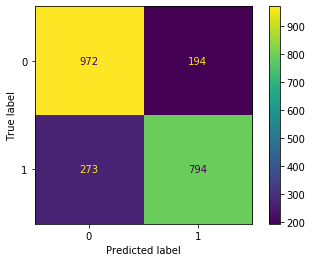

In [33]:
plot_confusion_matrix(lrg, Xts, yts)

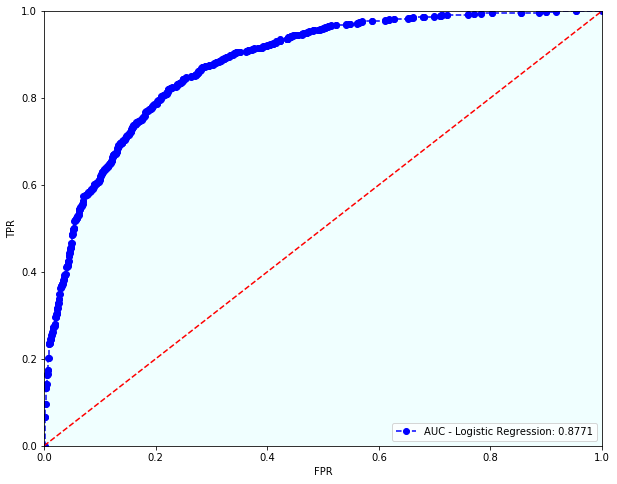

In [34]:
proba_lrg = lrg_proba[:,1]
fpr_lrg, tpr_lrg, thr_lrg = roc_curve(yts, proba_lrg)
auc_lrg = auc(fpr_lrg, tpr_lrg)

plt.figure(figsize=(10,8))
plt.plot(fpr_lrg, tpr_lrg, 'b--o', label='AUC - Logistic Regression: {}'.format(round(auc_lrg, 4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_lrg, tpr_lrg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [35]:
lrg_thr = pd.DataFrame({'thr': thr_lrg, 'tpr': tpr_lrg, 'fpr': fpr_lrg})
lrg_thr.head(15)

,thr,tpr,fpr
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.000858
2,0.991405,0.066542,0.000858
3,0.991130,0.066542,0.001715
4,0.983463,0.095595,0.001715
5,0.982049,0.095595,0.003431
6,0.974563,0.134021,0.003431
7,0.974453,0.134021,0.004288
8,0.972066,0.142455,0.004288
9,0.971723,0.142455,0.005146


In [36]:
pred_09 = [0 if x <0.983463  else 1 for x in proba_lrg]

In [37]:
confusion_matrix(yts, pred_09)

array([[1164,    2],
       [ 965,  102]])

In this prediction, the choice is to reduce the likelihood of the model making a False Positive (the customers are not potential to open term deposit but are predicted potential) as this will make the marketing team's campaign effective and efficient. This will help in minimizing the cost to the bank by avoiding to call customers who are unlikely to open the term deposit. 
Based on the comparing above, select logistic regression with shift threshold to 0.9 as the best model to predict. This can be seen from the smallest false positive value in the confusion matrix.

<hr>

### Deploy model to joblib

In [38]:
joblib.dump(lrg, "bestmodel")

['bestmodel']